In [2]:
get_ipython().magic('matplotlib inline')
import pandas as pd
import pandas_datareader.data as web
import datetime
from pandas_datareader._utils import RemoteDataError
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt


#share name like AAPL, yahoo,

In [3]:
def download_index():
    # download the indices needed
    df_index = pd.DataFrame()
    
    # declare the indices we used for future analysis
    index_list = ['^IXIC','^NYA','^DJI','^GSPC','000001.SS','^STOXX50E']
    
    i = 0
    while i < len(index_list):
        try:
            df_temp = web.DataReader(index_list[i], 'yahoo', start_date, end_date)
            df_index[index_list[i]] = df_temp['Adj Close']
            i += 1
        except RemoteDataError:
            print('RemoteDataError...Recatch...')
            continue
    return df_index

In [4]:
def verify_tickers():
    # ask for stock tickers input from users and verify the accessibility in Yahoo
    df_ticker = pd.read_csv("Yahoo_Stocks&Indexes_092017.csv")
    tickers_input = input("\nInput tickers you want to analyze in capitalized comma separated format:")
    tickers = tickers_input.split(",")
    if not tickers:
        print("\nInput tickers empty!\n")
    else:
        ticker_list = [ticker for ticker in tickers if ticker in
                       df_ticker.Ticker.unique()]
        print(ticker_list, ": searchable in Yahoo Finance!\n")

        ticker_error = [ticker for ticker in tickers if ticker not in
                        df_ticker.Ticker.unique()]
        if ticker_error:
            print(ticker_error, ": unrecognized in Yahoo Finance!\n")

        return ticker_list


In [5]:
def data_loader():
    print("Loading information from Yahoo! Finance...\n")
    # catch data of selected stocks from yahoo Finance
    df_volume = pd.DataFrame()
    df_price = pd.DataFrame()
    df_merged = download_index()
    i = 0
    while i < len(ticker_list):
        try:
            df = web.DataReader(ticker_list[i], 'yahoo',start_date, end_date)
            df_merged[ticker_list[i]] = df['Adj Close']
            df_price[ticker_list[i]] = df['Adj Close']
            df_volume[ticker_list[i]] = df['Volume']
            i += 1
        except RemoteDataError:
            print('RemoteDataError...Recatch...')
            continue
            
    print("\nHistory adjusted price of stocks selected:\n", df_price, "\nHistory volume of stocks selected:\n", df_volume)
    return df_merged, df_price, df_volume 

In [6]:
def corr_cal():
    # calculate the correlation between indices and selected stocks
    returns = df_merged.pct_change()
    corr = returns.corr().iloc[:6,6:]
    print("\nCorrelation of indexs and stocks:\n", '\n', corr)
    return returns, corr

In [7]:
def highest_stock_per_index():
    # get the stock with highest correlation per index
    print("\nStock with highest corr per index:\n")
    corr1 = corr
    corr1['highest'] = corr1.max(axis=1)
    for ticker in ticker_list:
        for index in index_list:
            if corr1.loc[index][ticker] == corr1.loc[index]['highest']:
                print(index, ':', corr1.loc[index]['highest'], ticker)

In [8]:
def highest_index_per_stock():
    # get the index with highest correlation per stock
    print("\nIndex with highest corr per stock:\n")
    corr2 = corr.transpose()
    corr2['highest'] = corr2.max(axis=1)
    for ticker in ticker_list:
        for index in index_list:
            if corr2[index][ticker] == corr2['highest'][ticker]:
                print(ticker, ":", corr2['highest'][ticker], index)

    return corr2

In [9]:
def higher_corr_with_shift():
    # get corr within +/-5 days shift that is higher than the corr get in former process
    print("\nWith +/-5 days shift of stock's history adj price, correlations might be higher than the former。")
    print("These are shifted correlation higher than former:\n")
    all_corr = {i:returns[6:].shift(i).corr().iloc[:6, 6:] for i in range(-5,6) if i != 0}
    for i in range(-5,6):
        if i != 0:
            for ticker in ticker_list:
                for index in index_list:
                    if all_corr[i].loc[index][ticker]> corr2['highest'][ticker]:
                        print(i, ticker, all_corr[i].loc[index][ticker], index)

In [10]:
def plot_graph():
    #plot the history adjust prices of indices, stocks, volume of stocks and corr of indices and stocks
    print("\nPlotting graphs...\n")
    df_index.plot(title='History Adj Close Price of Indices',figsize=(15,10))
    
    df_price.plot(title='History Adj Close Price of Stocks',figsize=(15,10))
    
    df_volume.plot(title='Histoy Volume of Stocks',figsize=(15,10))
    
    corr.plot(title='Corr of Indices and Stocks',figsize=(15,8))


Welcome to the Stock Analysis Program!

Start date: 2020-12-05 17:44:13.166627
End date: 2022-12-05 17:44:13.166627 



Input tickers you want to analyze in capitalized comma separated format:AAPL
['AAPL'] : searchable in Yahoo Finance!

Loading information from Yahoo! Finance...


History adjusted price of stocks selected:
                   AAPL
Date                  
2020-12-07  122.282082
2020-12-08  122.904610
2020-12-09  120.335449
2020-12-10  121.778137
2020-12-11  120.957985
...                ...
2022-11-28  144.220001
2022-11-29  141.169998
2022-11-30  148.029999
2022-12-01  148.309998
2022-12-02  147.809998

[502 rows x 1 columns] 
History volume of stocks selected:
                    AAPL
Date                   
2020-12-07   86712000.0
2020-12-08   82225500.0
2020-12-09  115089200.0
2020-12-10   81312200.0
2020-12-11   86939800.0
...                 ...
2022-11-28   69246000.0
2022-11-29   83763800.0
2022-11-30  111224400.0
2022-12-01   71250400.0
2022-12-02   65421400.0



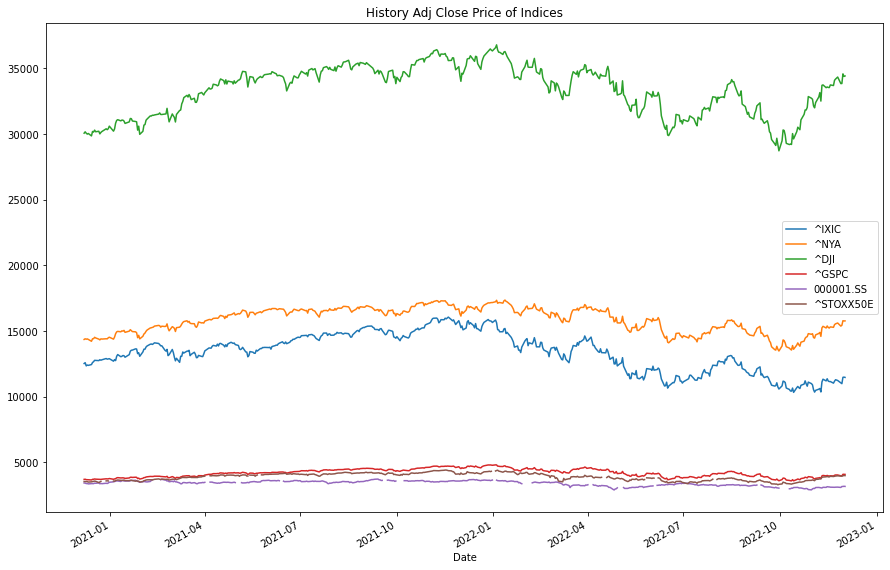

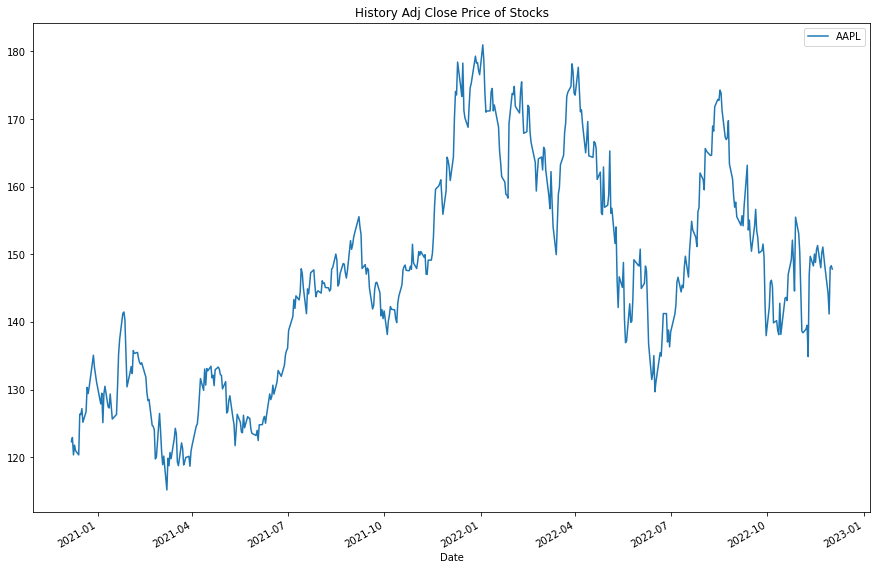

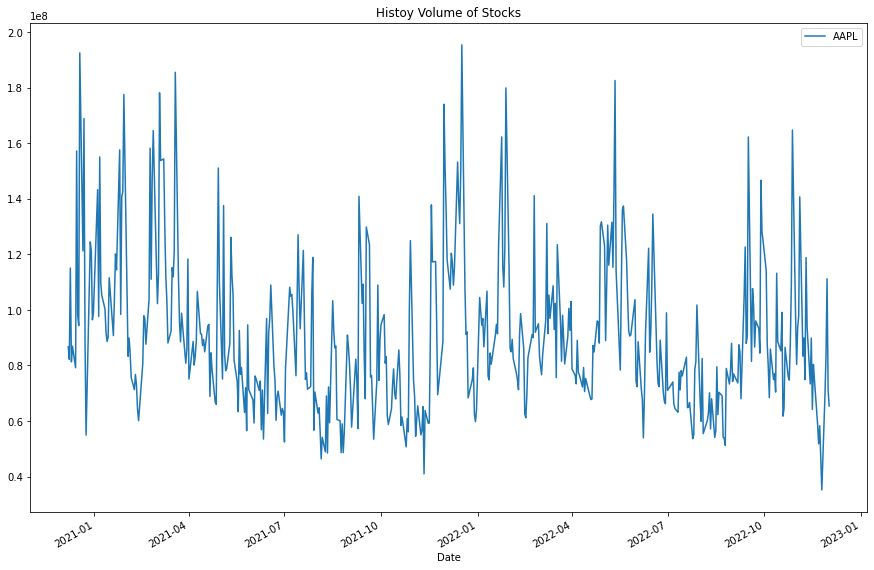

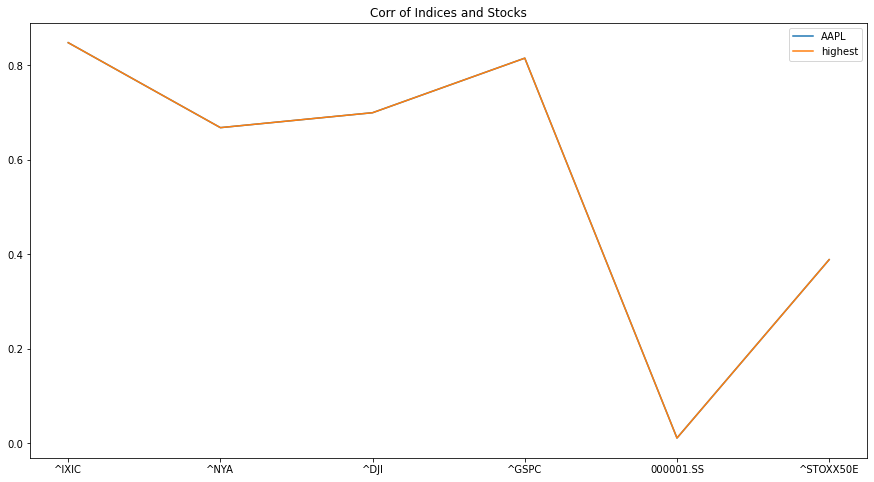

In [11]:
def main(): # main function
    print("Welcome to the Stock Analysis Program!\n")
    
    global start_date, end_date, index_list, df_index,ticker_list,df_merged, df_price, df_volume, corr, corr2, returns
    
    # get today's date as end_date for analysis
    end_date = datetime.datetime.today()
    start_date = end_date - relativedelta(months = 24)
    print("Start date: {}\nEnd date: {}".format(start_date, end_date), '\n'*2)
    
    # declare the indices we used for future analysis
    index_list = ['^IXIC','^NYA','^DJI','^GSPC','000001.SS','^STOXX50E']
    
    df_index = download_index()
    ticker_list = verify_tickers()
    df_merged, df_price, df_volume = data_loader()
    returns, corr = corr_cal()
    highest_stock_per_index()
    corr2 = highest_index_per_stock()
    higher_corr_with_shift()
    plot_graph()
    

if __name__ == '__main__':
    main()
